<a href="https://colab.research.google.com/github/alexpatri/artificial-intelligence/blob/main/1-2-tratamento-de-texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**O que é processamento de linguagem natural?**

O processamento de linguagem natural é um enorme campo de estudo e prática usada ativamente que visa dar sentido à linguagem usando estatísticas e computadores. Nas próximas atividades você aprenderá alguns dos fundamentos da PLN, que o ajudarão a passar de tópicos simples para tópicos mais difíceis e avançados. Você terá alguma exposição aos desafios da área, como identificação de tópicos e classificação de textos. Algumas áreas interessantes da PLN que você deve ter ouvido falar são: identificação de tópicos, chatbots, classificação de texto, tradução, análise de sentimento.

Expressões regulares são strings que você pode usar e que possuem uma sintaxe especial, que permite combinar padrões e encontrar outras strings. Um padrão é uma série de letras ou símbolos que podem ser mapeados para um texto real ou palavras ou pontuação. Você pode usar expressões regulares para fazer coisas como encontrar links em uma página da web, analisar endereços de e-mail e remover strings ou caracteres indesejados. Expressões regulares são freqüentemente chamadas de regex e podem ser usadas facilmente com python por meio da biblioteca `re`. Aqui temos uma importação simples da biblioteca. Podemos combinar uma substring usando o método re.match que combina um padrão com uma string. Ele pega o padrão como o primeiro argumento, a string como o segundo e retorna um objeto de correspondência. Também podemos usar padrões especiais que o regex entende, como o \ w + que corresponderá a uma palavra.

Existem centenas de caracteres e padrões que você pode aprender e memorizar com expressões regulares, mas para começar, compartilhamos alguns padrões comuns. O primeiro padrão \ w que já vimos, é usado para combinar palavras. O padrão \ d nos permite combinar dígitos, o que pode ser útil quando você precisa encontrá-los e separá-los em uma string. O padrão \ s corresponde a espaços, o ponto final é um caractere curinga. O curinga corresponderá a QUALQUER letra ou símbolo. Os caracteres + e * permitem que as coisas se tornem gananciosas, agarrando repetições de letras únicas ou padrões inteiros. Por exemplo, para corresponder a uma palavra inteira em vez de um caractere, precisamos adicionar o símbolo + após o \ w. Usar essas classes de caracteres como letras maiúsculas as nega, então o \ S corresponde a qualquer coisa que não seja um espaço. Você também pode criar um grupo de caracteres que deseja colocando-os entre colchetes, como nosso grupo de letras minúsculas.


In [2]:
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#https://cheatography.com/davechild/cheat-sheets/regular-expressions/

my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w*"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'I', 'Can', 'Or']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


In [ ]:
scene_one = "SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a temperate zone.\nARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?\nSOLDIER #1: Are you suggesting coconuts migrate?\nARTHUR: Not at all.  They could be carried.\nSOLDIER #1: What?  A swallow carrying a coconut?\nARTHUR: It could grip it by the husk!\nSOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.\nARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.\nSOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?\nARTHUR: Please!\nSOLDIER #1: Am I right?\nARTHUR: I'm not interested!\nSOLDIER #2: It could be carried by an African swallow!\nSOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.\nSOLDIER #2: Oh, yeah, I agree with that.\nARTHUR: Will you ask your master if he wants to join my court at Camelot?!\nSOLDIER #1: But then of course a-- African swallows are non-migratory.\nSOLDIER #2: Oh, yeah...\nSOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop] \nSOLDIER #2: Wait a minute!  Supposing two swallows carried it together?\nSOLDIER #1: No, they'd have to have it on a line.\nSOLDIER #2: Well, simple!  They'd just use a strand of creeper!\nSOLDIER #1: What, held under the dorsal guiding feathers?\nSOLDIER #2: Well, why not?\n"

# Import necessary modules
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[10])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)

{'servant', 'No', 'you', '?', 'together', 'forty-three', 'sovereign', "'m", 'maybe', 'That', 'ask', 'Will', 'if', 'winter', 'may', 'plover', 'defeator', 'our', 'five', 'Well', 'on', 'just', 'by', 'needs', 'its', 'pound', 'European', 'a', 'Oh', 'two', 'or', 'seek', 'use', 'strand', '!', 'warmer', 'interested', 'back', 'African', 'using', 'be', 'trusty', 'found', 'does', 'get', 'non-migratory', 'second', 'yeah', 'dorsal', 'Wait', 'I', 'go', 'agree', 'Ridden', 'with', 'wants', 'your', 'yet', 'is', 'Yes', "'re", 'martin', 'Halt', 'they', 'It', 'Please', 'England', 'them', 'land', 'Saxons', 'bring', 'all', 'could', 'weight', 'point', 'search', 'grips', 'Mercea', 'zone', 'King', 'Pendragon', 'question', "'ve", 'not', 'tropical', 'course', 'migrate', 'one', 'through', 'court', 'coconuts', 'The', 'Where', 'that', 'horse', 'empty', 'castle', 'an', 'beat', 'under', 'house', 'in', 'swallows', 'other', 'where', 'ARTHUR', 'Listen', 'speak', '[', "'s", '#', 'kingdom', 'Not', 'are', 'to', 'Arthur', '

In [ ]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

580 588


In [ ]:
# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

In [ ]:
tweets = ['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

pattern1 = r"#\w+"
# Use the pattern on the first tweet in the tweets list
hashtags = regexp_tokenize(tweets[0], pattern1)
print(hashtags)

pattern2 = r"([@#]\w+)"
# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print(mentions_hashtags)

tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

['#nlp', '#python']
['@datacamp', '#nlp', '#python']
[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


In [ ]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
['Wann', 'Pizza', 'Und', 'Über']
['🍕', '🚕']


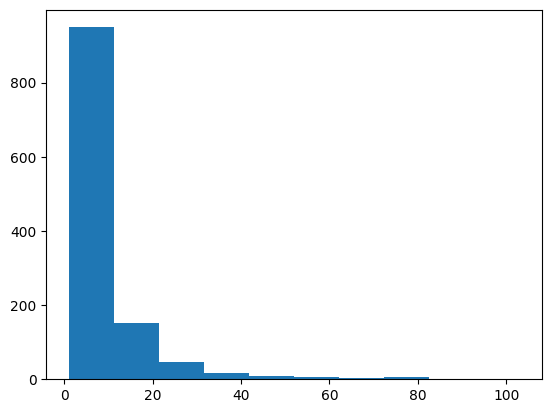

In [ ]:
#holy_grail = ""
holy_grail = open('holy_grail.txt', 'r')

from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize

# Split the script into lines: lines
lines = holy_grail.readlines()

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, "\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter
Counter(word_tokenize("Inserir Inserir qualquer texto nesse espaço e verificar o rsultado do texto"))

Counter({'Inserir': 2,
         'qualquer': 1,
         'texto': 2,
         'nesse': 1,
         'espaço': 1,
         'e': 1,
         'verificar': 1,
         'o': 1,
         'rsultado': 1,
         'do': 1})

Bag of Words

In [ ]:
article = open('debugging.txt', 'r')

# Import Counter
from collections import Counter

# Tokenize the article: tokens
tokens = word_tokenize(article.read())

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))


[(',', 151), ('the', 150), ('.', 89), ('of', 81), ('to', 63), ('a', 60), ('in', 44), ("''", 42), ('and', 41), ('(', 40)]


In [ ]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in stopwords.words('english')]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(100))

[('debugging', 36), ('system', 25), ('software', 16), ('bug', 15), ('problem', 15), ('computer', 14), ('tool', 14), ('process', 13), ('term', 13), ('used', 12), ('http', 11), ('program', 11), ('debugger', 10), ('programming', 9), ('technique', 9), ('language', 9), ('code', 8), ('example', 8), ('check', 8), ('error', 7), ('also', 7), ('make', 7), ('programmer', 6), ('may', 6), ('acm', 6), ('would', 6), ('user', 6), ('case', 6), ('test', 6), ('ref', 6), ('see', 5), ('memory', 5), ('change', 5), ('debug', 5), ('article', 5), ('hardware', 5), ('task', 5), ('execution', 5), ('source', 5), ('wolf', 5), ('cite', 5), ('control', 4), ('testing', 4), ('dump', 4), ('design', 4), ('early', 4), ('proceeding', 4), ('use', 4), ('computing', 4), ('national', 4), ('anomaly', 4), ('impact', 4), ('word', 4), ('might', 4), ('determine', 4), ('often', 4), ('value', 4), ('variable', 4), ('original', 4), ('state', 4), ('tracing', 4), ('different', 4), ('fence', 4), ('algorithm', 4), ('embedded', 4), ('file',

In [ ]:
stopwords.words('portuguese')

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [ ]:
articles = open('articles.txt', 'r')
articles = articles.readlines()
# Import Dictionary
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize

tokenized_articles = [word_tokenize(doc.lower()) for doc in articles]
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(tokenized_articles)

print(dictionary.token2id.get("transport"))

#dictionary.token2id

100


In [ ]:
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize
my_documents = ['The movie was about a spaceship and aliens.',
                'I really liked the movie!',
                'Awesome action scenes, but boring characters.',
                'The movie was awful! I hate alien films.',
                'Space is cool! I liked the movie.',
                'More space films, please!',]

tokenized_docs = [word_tokenize(doc.lower()) for doc in my_documents]
dictionary = Dictionary(tokenized_docs)
dictionary.token2id

{'.': 0,
 'a': 1,
 'about': 2,
 'aliens': 3,
 'and': 4,
 'movie': 5,
 'spaceship': 6,
 'the': 7,
 'was': 8,
 '!': 9,
 'i': 10,
 'liked': 11,
 'really': 12,
 ',': 13,
 'action': 14,
 'awesome': 15,
 'boring': 16,
 'but': 17,
 'characters': 18,
 'scenes': 19,
 'alien': 20,
 'awful': 21,
 'films': 22,
 'hate': 23,
 'cool': 24,
 'is': 25,
 'space': 26,
 'more': 27,
 'please': 28}

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(0, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(0, 1),
  (5, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(0, 1), (5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (24, 1), (25, 1), (26, 1)],
 [(9, 1), (13, 1), (22, 1), (26, 1), (27, 1), (28, 1)]]

In [ ]:
from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(corpus)
tfidf[corpus[1]]

[(5, 0.1746298276735174),
 (7, 0.1746298276735174),
 (9, 0.1746298276735174),
 (10, 0.29853166221463673),
 (11, 0.47316148988815415),
 (12, 0.7716931521027908)]

Gensim - https://radimrehurek.com/gensim/